In [1]:
#Disable Warnings for deprecation and other issues
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test = pd.read_pickle("test_data.pkl")
train = pd.read_pickle("train_data.pkl")


In [4]:
test.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,0.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,0.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Check for duplicates in alert_key in test data
test['alert_key'].duplicated().sum()

0

In [6]:
train.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(train)

15313

In [8]:
#Assign sar_flag to Y 
Y = train['sar_flag']
#Drop sar_flag from train
train.drop('sar_flag', axis=1, inplace=True)

#Drop sar_flag from test
test.drop('sar_flag', axis=1, inplace=True)

#Check the shape of train and test
print(train.shape)
print(test.shape)

#Add Alert Key to new dataframe
testAlert = pd.DataFrame(test['alert_key'])

#Drop alert_key and cust_id from test
test.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of test
print(test.shape)

#check shape of testAlert
print(testAlert.shape)

(15313, 17)
(1845, 17)
(1845, 15)
(1845, 1)


In [9]:
#Assign the columns to X
X = train
#Drop alert_key and cust_id from X
X.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of X
print(X.shape)

(15313, 15)


In [10]:
Y.head()

15856    0.0
15869    0.0
15883    0.0
15896    0.0
15909    0.0
Name: sar_flag, dtype: float64

In [11]:
Y.value_counts()

0.0    15189
1.0      124
Name: sar_flag, dtype: int64

In [12]:
#Import SMOTE
from imblearn.over_sampling import SMOTE


In [13]:
#Use SMOTE to balance the data with 1 to 0.5 ratio
sm = SMOTE(random_state=42, sampling_strategy=1)
X_res, Y_res = sm.fit_sample(X, Y)

#Check the shape of X_res and Y_res
print(X_res.shape)
print(Y_res.shape)



(30378, 15)
(30378,)


In [14]:
#Y_res head
Y_res.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: sar_flag, dtype: float64

In [15]:
#Check the value counts of the oversampled data
Y_res.value_counts()

0.0    15189
1.0    15189
Name: sar_flag, dtype: int64

In [16]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 42)


In [17]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [18]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      3041
         1.0       0.95      0.98      0.96      3035

    accuracy                           0.96      6076
   macro avg       0.96      0.96      0.96      6076
weighted avg       0.96      0.96      0.96      6076

Confusion matrix:
 [[2869  172]
 [  51 2984]]


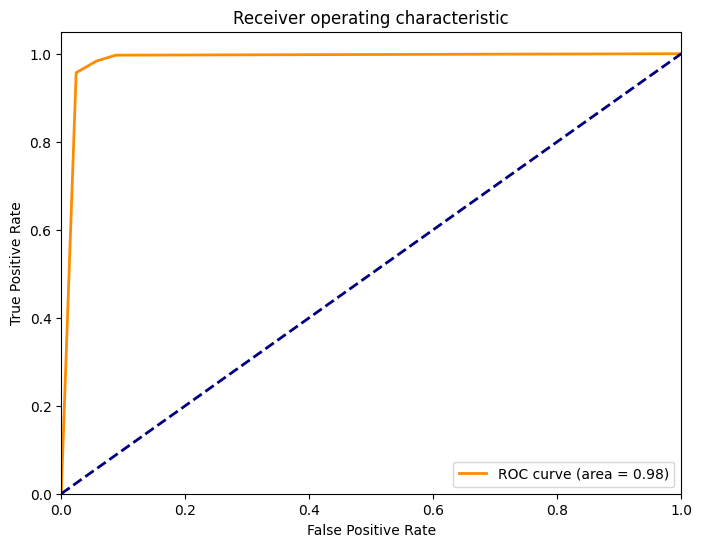

In [19]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3041
         1.0       0.99      0.99      0.99      3035

    accuracy                           0.99      6076
   macro avg       0.99      0.99      0.99      6076
weighted avg       0.99      0.99      0.99      6076

Confusion matrix:
 [[3021   20]
 [  16 3019]]


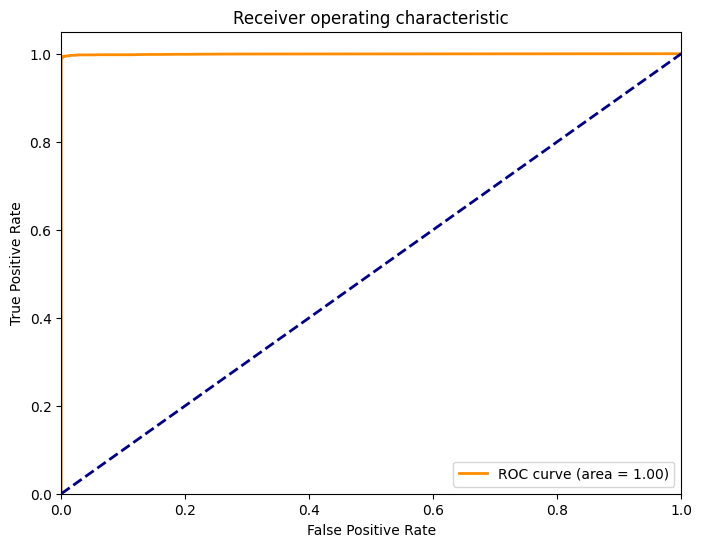

In [20]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

Classification report for classifier :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3041
         1.0       1.00      1.00      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3032    9]
 [  15 3020]]


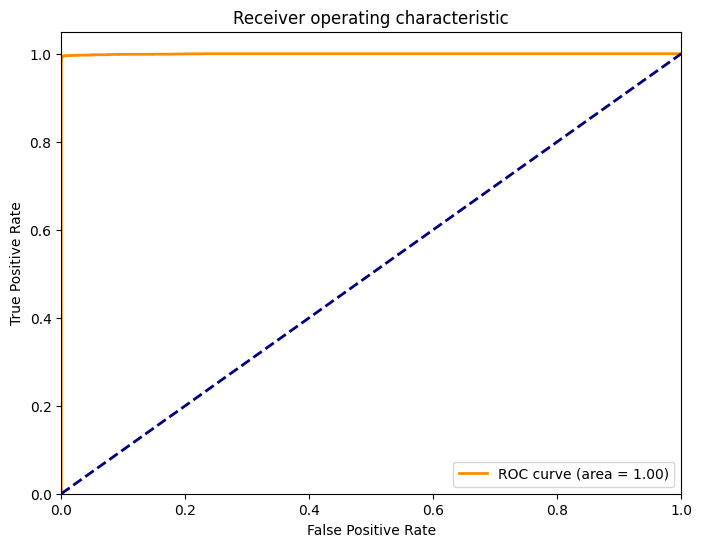

In [21]:
#Create XGBoost Classifier
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic',eval_metric='rmse')

xgboost.fit(X_train, Y_train)
xgb_pred = xgboost.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgboost.predict_proba(X_test)[::,1])


In [22]:
#Check the accuracy of the model
print("Accuracy of the model is: ", accuracy_score(Y_test, xgb_pred))

Accuracy of the model is:  0.9960500329163924


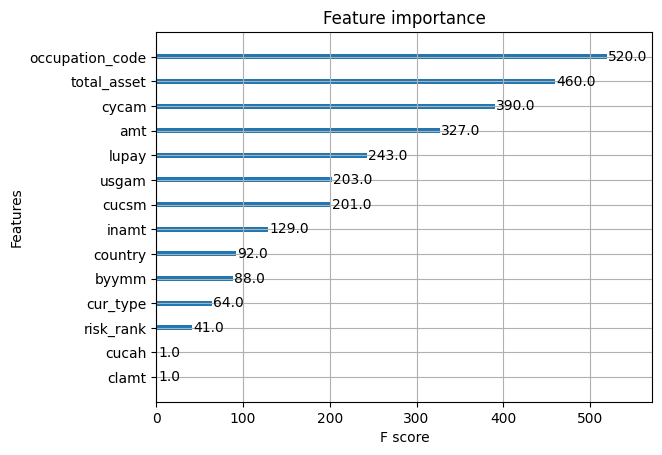

In [23]:
#Plot feature importance
xgb.plot_importance(xgboost)
plt.show()

In [24]:
#List columns in X_train data
X_train.columns


Index(['risk_rank', 'occupation_code', 'total_asset', 'country', 'cur_type',
       'amt', 'lupay', 'byymm', 'cycam', 'usgam', 'clamt', 'csamt', 'inamt',
       'cucsm', 'cucah'],
      dtype='object')

In [25]:
#Remove columns with low importance from X_train such as clamt, cucah, risk_rank cur_type, byymm, country
#X_train.drop(['clamt','cucah','risk_rank','cur_type','byymm','country'], axis=1, inplace=True)

#Remove columns with low importance from X_train and X_test and test such as clamt, cucah, cur_type,csamt
X_train.drop(['clamt','cucah','cur_type','csamt'], axis=1, inplace=True)
X_test.drop(['clamt','cucah','cur_type','csamt'], axis=1, inplace=True)
test.drop(['clamt','cucah','cur_type','csamt'], axis=1, inplace=True)




In [26]:
#Remove columns with low importance from X_test such as clamt, cucah, risk_rank cur_type, byymm, country
#X_test.drop(['clamt','cucah','risk_rank','cur_type','byymm','country'], axis=1, inplace=True)

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3041
         1.0       1.00      0.99      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3033    8]
 [  17 3018]]


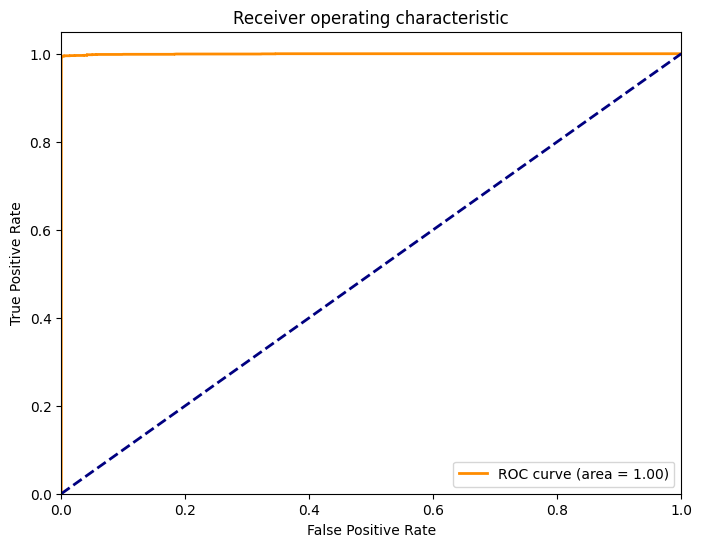

Accuracy of the model is:  0.9958854509545754


In [27]:
#Recreate the XGBoost Classifier
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic',eval_metric='rmse')

xgboost.fit(X_train, Y_train)
xgb_pred = xgboost.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgboost.predict_proba(X_test)[::,1])

#Check the accuracy of the model
print("Accuracy of the model is: ", accuracy_score(Y_test, xgb_pred))


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      3041
         1.0       0.95      0.98      0.96      3035

    accuracy                           0.96      6076
   macro avg       0.96      0.96      0.96      6076
weighted avg       0.96      0.96      0.96      6076

Confusion matrix:
 [[2868  173]
 [  51 2984]]


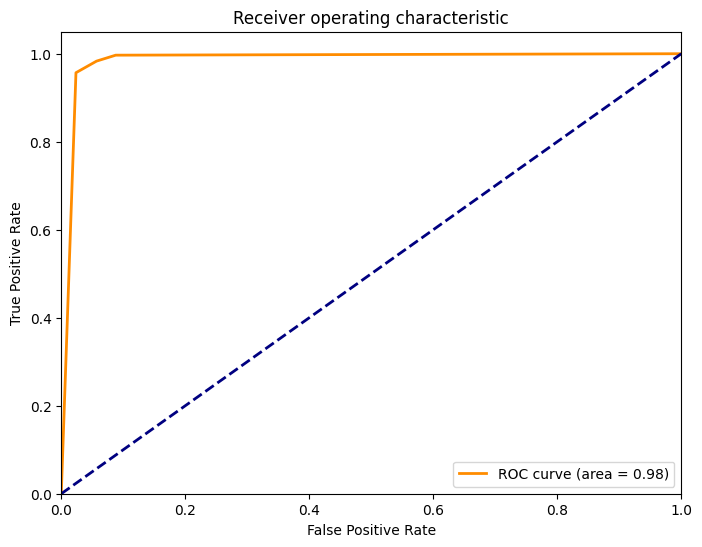

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3041
         1.0       0.99      0.99      0.99      3035

    accuracy                           0.99      6076
   macro avg       0.99      0.99      0.99      6076
weighted avg       0.99      0.99      0.99      6076

Confusion matrix:
 [[3023   18]
 [  17 3018]]


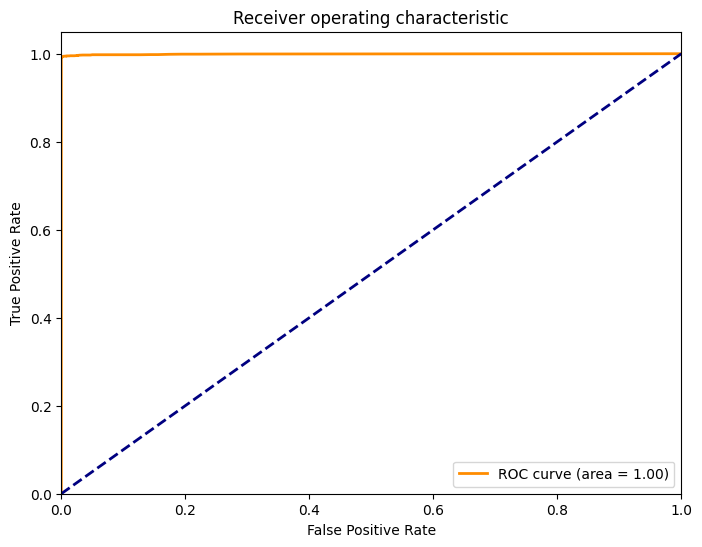

Accuracy of the KNN model is:  0.9631336405529954
Accuracy of the RFC model is:  0.9942396313364056


In [28]:
#Retrain KNN and RFC models
#Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

#Check the accuracy of the both models
print("Accuracy of the KNN model is: ", accuracy_score(Y_test, knn_pred))
print("Accuracy of the RFC model is: ", accuracy_score(Y_test, rfc_pred))


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.51      0.92      0.65      3041
         1.0       0.57      0.11      0.18      3035

    accuracy                           0.51      6076
   macro avg       0.54      0.51      0.42      6076
weighted avg       0.54      0.51      0.42      6076

Confusion matrix:
 [[2798  243]
 [2711  324]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


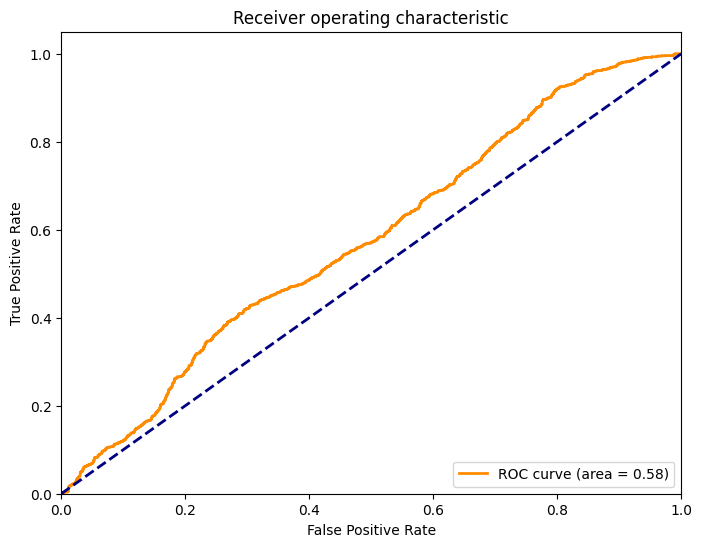

In [29]:
#Create Logistic Regression Classifier for fraud detection
lr = LogisticRegression(random_state=42, class_weight='balanced', verbose=1)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, lr_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, lr_pred))
plot_roc_curve(Y_test, lr.predict_proba(X_test)[::,1])

In [30]:
test.head()

,risk_rank,occupation_code,total_asset,country,amt,lupay,byymm,cycam,usgam,inamt,cucsm
0,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,98177.0,130.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,-2178.0
14,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,3,15.0,201906.0,130.0,144559.0,4447.0,0.0,206512.0,210149.0,0.0,2548.0
28,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
len(test)


1845

In [32]:
#Use classifier to test the test data
xgb_pred_test = xgboost.predict(test)
knn_pred_test = knn.predict(test)
rfc_pred_test = rfc.predict(test)
lr_pred_test = lr.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
#Create a dataframe with the results
results = pd.DataFrame({'XGB':xgb_pred_test, 'KNN':knn_pred_test, 'RFC':rfc_pred_test, 'LR':lr_pred_test})
results.head()



,XGB,KNN,RFC,LR
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [34]:
results['XGB'].value_counts()

0.0    1837
1.0       8
Name: XGB, dtype: int64

In [35]:
results['KNN'].value_counts()

0.0    1555
1.0     290
Name: KNN, dtype: int64

In [35]:
results['RFC'].value_counts()

0.0    1828
1.0      17
Name: RFC, dtype: int64

In [36]:
results['LR'].value_counts()

0.0    1118
1.0     727
Name: LR, dtype: int64

In [37]:
#Predict probablity of fraud using models
xgb_pred_test_prob = xgboost.predict_proba(test)
knn_pred_test_prob = knn.predict_proba(test)
rfc_pred_test_prob = rfc.predict_proba(test)
lr_pred_test_prob = lr.predict_proba(test)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [38]:
#print the probablity of fraud
print(xgb_pred_test_prob)
print(knn_pred_test_prob)
print(rfc_pred_test_prob)
print(lr_pred_test_prob)

[[9.9921805e-01 7.8195269e-04]
 [9.8796946e-01 1.2030549e-02]
 [9.9965304e-01 3.4697977e-04]
 ...
 [9.9996442e-01 3.5560322e-05]
 [9.7625524e-01 2.3744775e-02]
 [9.8574293e-01 1.4257084e-02]]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]]
[[0.91 0.09]
 [0.98 0.02]
 [0.91 0.09]
 ...
 [0.95 0.05]
 [0.6  0.4 ]
 [0.98 0.02]]
[[0.48564429 0.51435571]
 [0.51923923 0.48076077]
 [0.47989968 0.52010032]
 ...
 [0.50111895 0.49888105]
 [0.50567596 0.49432404]
 [0.49918559 0.50081441]]


In [39]:
#Create dataframe with probablity of fraud from xgb
xgb_pred_test_prob = pd.DataFrame(xgb_pred_test_prob)
xgb_pred_test_prob.head()

,0,1
0,0.999218,0.000782
1,0.987969,0.012031
2,0.999653,0.000347
3,0.999937,0.000063
4,0.998427,0.001573


In [40]:
#Create dataframe with probablity of fraud from knn
knn_pred_test_prob = pd.DataFrame(knn_pred_test_prob)
knn_pred_test_prob.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [41]:
#Create dataframe with probablity of fraud from rfc
rfc_pred_test_prob = pd.DataFrame(rfc_pred_test_prob)
rfc_pred_test_prob.head()

,0,1
0,0.91,0.09
1,0.98,0.02
2,0.91,0.09
3,1.00,0.00
4,0.90,0.10


In [42]:
#Create dataframe with probablity of fraud from lr
lr_pred_test_prob = pd.DataFrame(lr_pred_test_prob)
lr_pred_test_prob.head()

,0,1
0,0.485644,0.514356
1,0.519239,0.480761
2,0.479900,0.520100
3,0.573636,0.426364
4,0.499927,0.500073


In [43]:
bTrain = pd.read_pickle("train_data.pkl")
bTest = pd.read_pickle("test_data.pkl")

In [44]:
bTrain.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
15856,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
15869,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
15883,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
15896,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
15909,171181,d253f77ce816406296362e15aa64888080acc551e9c596...,3,17.0,1827055.0,0.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
bTest.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,0.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,0.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
len(bTrain)


15313

In [47]:
len(bTest)

1845

In [48]:
len(testAlert)

1845

In [49]:
len(xgb_pred_test_prob)

1845

In [50]:
#Conver xgb_pred_test_prob to csv
xgb_pred_test_prob.to_csv('xgb_pred_test_prob.csv', index=False)

In [51]:
#Reset index of testAlert
testAlert.reset_index(drop=True, inplace=True)


In [52]:
#Add probablity of fraud to the testalert dataframe
testAlert['probability'] = xgb_pred_test_prob[1]
testAlert.head()






,alert_key,probability
0,352249,0.000782
1,352253,0.012031
2,352254,0.000347
3,352280,0.000063
4,352282,0.001573


In [53]:
len(testAlert)


1845

In [54]:
my_submission = testAlert

In [55]:
#find 357307 in the testAlert dataframe
testAlert.loc[testAlert['alert_key'] == 357307]


,alert_key,probability
720,357307,0.003491


In [56]:
#Import sample.cs to dataframe
sample = pd.read_csv("sample.csv")
sample.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [57]:
len(sample)

3850

In [58]:
#Combine my_submission and sample and replace the probability column with my_submission probability column
my_submission_combine = pd.merge(sample, testAlert, on='alert_key', how='left')
my_submission_combine.head()


,alert_key,probability_x,probability_y
0,357307,0.000017,0.003491
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.002360
4,354443,0.000526,0.003938


In [59]:
len(my_submission_combine)

3850

In [60]:
#find row with 352249.0
my_submission_combine.loc[my_submission_combine['alert_key'] == 352249.0]


,alert_key,probability_x,probability_y
372,352249,0.098923,0.000782


In [61]:
#Replace the null values with the sample probability but keep the non null values
my_submission_combine['probability'] = my_submission_combine['probability_y'].fillna(my_submission_combine['probability_x'])
my_submission_combine.head()





,alert_key,probability_x,probability_y,probability
0,357307,0.000017,0.003491,0.003491
1,376329,0.000324,NaN,0.000324
2,373644,0.000372,NaN,0.000372
3,357668,0.000489,0.002360,0.002360
4,354443,0.000526,0.003938,0.003938


In [62]:
len(my_submission_combine)

3850

In [63]:
#Drop the probability_x and probability_y columns
my_submission_combine.drop(['probability_x', 'probability_y'], axis=1, inplace=True)
my_submission_combine.head()

,alert_key,probability
0,357307,0.003491
1,376329,0.000324
2,373644,0.000372
3,357668,0.002360
4,354443,0.003938


In [64]:
#My submission combine dataframe head
my_submission_combine.head()

,alert_key,probability
0,357307,0.003491
1,376329,0.000324
2,373644,0.000372
3,357668,0.002360
4,354443,0.003938


In [65]:
#convert the dataframe to csv
my_submission_combine.to_csv('submissionUpdatedDataSet.csv', index=False)


In [66]:
#Implement kfolds cross validation to check the accuracy of the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgboost, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 99.50 %
Standard Deviation: 0.15 %


In [67]:
#Import Optuna
import optuna


In [68]:
#Create a function to optimize the hyperparameters of xgb
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }
    xgb = XGBClassifier(**param)
    xgb.fit(X_train, Y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    return accuracy



    

In [69]:
#Create a study object and optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)


[I 2022-12-25 12:56:04,002] A new study created in memory with name: no-name-5acefaac-567c-4a48-97a6-aaf042d38f01


[12:56:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:09,691] Trial 0 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 310, 'max_depth': 9, 'learning_rate': 0.08265885310883955, 'subsample': 0.5305869432369005, 'colsample_bytree': 0.8182275782839113, 'gamma': 0.0001965431252384557, 'reg_alpha': 0.47598036224251977, 'reg_lambda': 3.9346857887815423e-07}. Best is trial 0 with value: 0.9965437788018433.


[12:56:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:21,429] Trial 1 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 706, 'max_depth': 8, 'learning_rate': 0.013016328364292236, 'subsample': 0.7368737724188945, 'colsample_bytree': 0.44858752255211815, 'gamma': 0.009989318681593544, 'reg_alpha': 2.2025423137510822e-07, 'reg_lambda': 3.0440277080004174e-05}. Best is trial 0 with value: 0.9965437788018433.


[12:56:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:25,264] Trial 2 finished with value: 0.989302172481896 and parameters: {'n_estimators': 330, 'max_depth': 6, 'learning_rate': 0.020351679288368084, 'subsample': 0.41381710564354035, 'colsample_bytree': 0.7102118133682985, 'gamma': 1.9864560781718172e-08, 'reg_alpha': 2.3924342028026513e-08, 'reg_lambda': 5.715610426850047e-08}. Best is trial 0 with value: 0.9965437788018433.


[12:56:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:27,838] Trial 3 finished with value: 0.9935813034891375 and parameters: {'n_estimators': 230, 'max_depth': 5, 'learning_rate': 0.07872461210133282, 'subsample': 0.46548438651924584, 'colsample_bytree': 0.8248464179618286, 'gamma': 0.09395690642700852, 'reg_alpha': 6.105278919362559e-08, 'reg_lambda': 0.0008767431603844149}. Best is trial 0 with value: 0.9965437788018433.


[12:56:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:41,413] Trial 4 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 979, 'max_depth': 7, 'learning_rate': 0.09280966014875135, 'subsample': 0.7098652819271434, 'colsample_bytree': 0.8725468750818162, 'gamma': 0.0026249896223900612, 'reg_alpha': 0.0027778170006529735, 'reg_lambda': 9.717111615351337e-08}. Best is trial 4 with value: 0.9967083607636603.


[12:56:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:45,860] Trial 5 finished with value: 0.9945687952600395 and parameters: {'n_estimators': 415, 'max_depth': 5, 'learning_rate': 0.08842773283711791, 'subsample': 0.5326252219110189, 'colsample_bytree': 0.43687754201786677, 'gamma': 0.7696352393619842, 'reg_alpha': 0.0016718718310048707, 'reg_lambda': 2.79543425604032e-06}. Best is trial 4 with value: 0.9967083607636603.


[12:56:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:47,556] Trial 6 finished with value: 0.9815668202764977 and parameters: {'n_estimators': 219, 'max_depth': 3, 'learning_rate': 0.10525372576201832, 'subsample': 0.4724803117889372, 'colsample_bytree': 0.708141603529483, 'gamma': 1.4814588364388703e-07, 'reg_alpha': 0.0008474891148871157, 'reg_lambda': 0.00027588622499528817}. Best is trial 4 with value: 0.9967083607636603.


[12:56:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:56:51,887] Trial 7 finished with value: 0.9846938775510204 and parameters: {'n_estimators': 522, 'max_depth': 3, 'learning_rate': 0.048649499130598885, 'subsample': 0.717657373890649, 'colsample_bytree': 0.799397887792079, 'gamma': 0.15556960861672253, 'reg_alpha': 1.1888238806727831e-07, 'reg_lambda': 0.00025485675051019634}. Best is trial 4 with value: 0.9967083607636603.


[12:56:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:01,427] Trial 8 finished with value: 0.9957208689927584 and parameters: {'n_estimators': 982, 'max_depth': 4, 'learning_rate': 0.27905436313742776, 'subsample': 0.8522653934680211, 'colsample_bytree': 0.4490354587789779, 'gamma': 0.0004312614158633467, 'reg_alpha': 4.494825696753031e-05, 'reg_lambda': 0.0386809184156466}. Best is trial 4 with value: 0.9967083607636603.


[12:57:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:03,163] Trial 9 finished with value: 0.9927583936800527 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.047526929958600465, 'subsample': 0.5001376421863787, 'colsample_bytree': 0.6408687920746537, 'gamma': 1.0559985582653976e-06, 'reg_alpha': 0.1965744178224604, 'reg_lambda': 0.19361695956242214}. Best is trial 4 with value: 0.9967083607636603.


[12:57:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:16,907] Trial 10 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 990, 'max_depth': 10, 'learning_rate': 0.41841837070078935, 'subsample': 0.9604660570178088, 'colsample_bytree': 0.998061776033329, 'gamma': 7.120219155176934e-06, 'reg_alpha': 9.934987064938977e-06, 'reg_lambda': 1.4747273806378285e-08}. Best is trial 4 with value: 0.9967083607636603.


[12:57:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:26,089] Trial 11 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 681, 'max_depth': 9, 'learning_rate': 0.16590163508587663, 'subsample': 0.6144587466560588, 'colsample_bytree': 0.9708110609203076, 'gamma': 0.0004240488353917316, 'reg_alpha': 0.4584295854463292, 'reg_lambda': 4.22046585021482e-07}. Best is trial 4 with value: 0.9967083607636603.


[12:57:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:37,845] Trial 12 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 817, 'max_depth': 7, 'learning_rate': 0.0311878116438325, 'subsample': 0.5989065970614259, 'colsample_bytree': 0.5454743119463101, 'gamma': 6.460789589705954e-05, 'reg_alpha': 0.018722770121698172, 'reg_lambda': 2.191489772703407e-06}. Best is trial 4 with value: 0.9967083607636603.


[12:57:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:45,728] Trial 13 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 491, 'max_depth': 10, 'learning_rate': 0.16776489396638242, 'subsample': 0.7044717784872603, 'colsample_bytree': 0.866653818696037, 'gamma': 0.009425500019389889, 'reg_alpha': 0.019920073962391868, 'reg_lambda': 1.2684720435418886e-07}. Best is trial 4 with value: 0.9967083607636603.


[12:57:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:57:54,664] Trial 14 finished with value: 0.9955562870309415 and parameters: {'n_estimators': 651, 'max_depth': 8, 'learning_rate': 0.16571587326952517, 'subsample': 0.5804622369618311, 'colsample_bytree': 0.5470252727223801, 'gamma': 0.0021386926249921854, 'reg_alpha': 0.022545152564335147, 'reg_lambda': 1.0850668221248965e-05}. Best is trial 4 with value: 0.9967083607636603.


[12:57:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:07,167] Trial 15 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 802, 'max_depth': 7, 'learning_rate': 0.04713362036837107, 'subsample': 0.7830442733349889, 'colsample_bytree': 0.8873036717834761, 'gamma': 2.9794230655620522e-05, 'reg_alpha': 0.9387519890930455, 'reg_lambda': 8.459428893659271e-07}. Best is trial 4 with value: 0.9967083607636603.


[12:58:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:13,433] Trial 16 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 375, 'max_depth': 9, 'learning_rate': 0.105886906046431, 'subsample': 0.6434687704546106, 'colsample_bytree': 0.7276012579270534, 'gamma': 4.8923196979408e-06, 'reg_alpha': 0.0011151668093353905, 'reg_lambda': 1.2917395034184656e-08}. Best is trial 4 with value: 0.9967083607636603.


[12:58:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:24,453] Trial 17 finished with value: 0.9953917050691244 and parameters: {'n_estimators': 863, 'max_depth': 6, 'learning_rate': 0.02921644275272161, 'subsample': 0.5566913279727543, 'colsample_bytree': 0.7705015090286096, 'gamma': 0.0009079099208925376, 'reg_alpha': 2.203881509097737e-06, 'reg_lambda': 0.0017780535011690675}. Best is trial 4 with value: 0.9967083607636603.


[12:58:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:34,985] Trial 18 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 572, 'max_depth': 9, 'learning_rate': 0.06292674370502747, 'subsample': 0.8527300469524925, 'colsample_bytree': 0.6503051369188456, 'gamma': 0.009400452457361515, 'reg_alpha': 0.08598492329390113, 'reg_lambda': 2.3361346886513806e-07}. Best is trial 4 with value: 0.9967083607636603.


[12:58:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:38,175] Trial 19 finished with value: 0.9953917050691244 and parameters: {'n_estimators': 262, 'max_depth': 7, 'learning_rate': 0.24648846244719377, 'subsample': 0.4091383638985703, 'colsample_bytree': 0.9133059100333846, 'gamma': 0.00015734786346053661, 'reg_alpha': 0.00018951025763617584, 'reg_lambda': 1.4244137921491161e-05}. Best is trial 4 with value: 0.9967083607636603.


[12:58:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:40,785] Trial 20 finished with value: 0.9957208689927584 and parameters: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.12834183528184667, 'subsample': 0.6692367938118462, 'colsample_bytree': 0.5803532051692929, 'gamma': 2.003248636181847e-05, 'reg_alpha': 0.008341857060369471, 'reg_lambda': 5.8666579546359505e-08}. Best is trial 4 with value: 0.9967083607636603.


[12:58:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:58:51,584] Trial 21 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 595, 'max_depth': 9, 'learning_rate': 0.06382609107590496, 'subsample': 0.8500243613092168, 'colsample_bytree': 0.6467118284052911, 'gamma': 0.007635835100278293, 'reg_alpha': 0.10695968629494293, 'reg_lambda': 3.5494354218257775e-07}. Best is trial 4 with value: 0.9967083607636603.


[12:58:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:59:00,670] Trial 22 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 436, 'max_depth': 10, 'learning_rate': 0.06595005179546176, 'subsample': 0.9960302266736188, 'colsample_bytree': 0.5993325490240894, 'gamma': 0.002622115521015039, 'reg_alpha': 0.1814013034747685, 'reg_lambda': 2.235518563584577e-06}. Best is trial 4 with value: 0.9967083607636603.


[12:59:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:59:12,620] Trial 23 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 614, 'max_depth': 9, 'learning_rate': 0.031044293113032823, 'subsample': 0.8383678940162411, 'colsample_bytree': 0.5091254188095922, 'gamma': 0.0821884767252329, 'reg_alpha': 0.0042786029404314, 'reg_lambda': 4.782057664886628e-07}. Best is trial 4 with value: 0.9967083607636603.


[12:59:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:59:24,508] Trial 24 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 610, 'max_depth': 9, 'learning_rate': 0.02834312194630908, 'subsample': 0.8614877778916591, 'colsample_bytree': 0.4985699551483971, 'gamma': 0.07362671901549414, 'reg_alpha': 0.0031067252037025113, 'reg_lambda': 2.385528871894042e-08}. Best is trial 24 with value: 0.9970375246872942.


[12:59:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:59:38,459] Trial 25 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 577, 'max_depth': 10, 'learning_rate': 0.010344134974579823, 'subsample': 0.8736054341413904, 'colsample_bytree': 0.4926247126485139, 'gamma': 0.12744432058197794, 'reg_alpha': 0.000238740580884487, 'reg_lambda': 1.292034364885707e-08}. Best is trial 24 with value: 0.9970375246872942.


[12:59:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 12:59:51,308] Trial 26 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 620, 'max_depth': 9, 'learning_rate': 0.02345236438966849, 'subsample': 0.9201628751600455, 'colsample_bytree': 0.49524119832982283, 'gamma': 0.03787749655455584, 'reg_alpha': 0.05706610268559944, 'reg_lambda': 4.846254183429101e-06}. Best is trial 24 with value: 0.9970375246872942.


[12:59:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:00:03,866] Trial 27 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 718, 'max_depth': 8, 'learning_rate': 0.019624238569041063, 'subsample': 0.7887517222295605, 'colsample_bytree': 0.40907086402064385, 'gamma': 0.6780469645814993, 'reg_alpha': 0.004171468061317931, 'reg_lambda': 6.429128860059536e-06}. Best is trial 24 with value: 0.9970375246872942.


[13:00:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:00:16,546] Trial 28 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 637, 'max_depth': 9, 'learning_rate': 0.030258340579028903, 'subsample': 0.9173959393218153, 'colsample_bytree': 0.49563849511018315, 'gamma': 0.02949826153613944, 'reg_alpha': 2.922259832567714e-05, 'reg_lambda': 7.137020561400429e-05}. Best is trial 24 with value: 0.9970375246872942.


[13:00:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:00:31,592] Trial 29 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 745, 'max_depth': 9, 'learning_rate': 0.018437496825868146, 'subsample': 0.9137964134854853, 'colsample_bytree': 0.4799609810560005, 'gamma': 0.043368813636695994, 'reg_alpha': 2.375760781605166e-05, 'reg_lambda': 0.007496448257263071}. Best is trial 24 with value: 0.9970375246872942.


[13:00:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:00:47,714] Trial 30 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 745, 'max_depth': 10, 'learning_rate': 0.017572875263011777, 'subsample': 0.9212326231589659, 'colsample_bytree': 0.47007660285988295, 'gamma': 0.02940613839722571, 'reg_alpha': 2.111431355552632e-06, 'reg_lambda': 0.017465046487853155}. Best is trial 24 with value: 0.9970375246872942.


[13:00:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:01:04,381] Trial 31 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 758, 'max_depth': 10, 'learning_rate': 0.017868017420691648, 'subsample': 0.9430856154393963, 'colsample_bytree': 0.4726461777156766, 'gamma': 0.03446324012624251, 'reg_alpha': 1.1200549949867058e-06, 'reg_lambda': 0.0069323898205974465}. Best is trial 24 with value: 0.9970375246872942.


[13:01:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:01:19,936] Trial 32 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 737, 'max_depth': 10, 'learning_rate': 0.014432608623598436, 'subsample': 0.7901257607561166, 'colsample_bytree': 0.46134088769644055, 'gamma': 0.308005861771106, 'reg_alpha': 1.0094102213625862e-06, 'reg_lambda': 0.007140928574210477}. Best is trial 24 with value: 0.9970375246872942.


[13:01:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:01:39,573] Trial 33 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 884, 'max_depth': 10, 'learning_rate': 0.016062192941039905, 'subsample': 0.9981437217938964, 'colsample_bytree': 0.41987428521201564, 'gamma': 0.02433665216191393, 'reg_alpha': 1.1646323773533782e-06, 'reg_lambda': 0.02196689680375869}. Best is trial 24 with value: 0.9970375246872942.


[13:01:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:01:57,168] Trial 34 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 774, 'max_depth': 10, 'learning_rate': 0.010858943593439637, 'subsample': 0.917480957268085, 'colsample_bytree': 0.47034799589758297, 'gamma': 0.31573156865418656, 'reg_alpha': 8.67491660536556e-06, 'reg_lambda': 0.41511193224784526}. Best is trial 24 with value: 0.9970375246872942.


[13:01:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:02:13,732] Trial 35 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 870, 'max_depth': 8, 'learning_rate': 0.019087485479712382, 'subsample': 0.9388741366116562, 'colsample_bytree': 0.5352421385422298, 'gamma': 0.022753864492947858, 'reg_alpha': 4.525635823090567e-06, 'reg_lambda': 0.0030806537412050613}. Best is trial 24 with value: 0.9970375246872942.


[13:02:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:02:28,565] Trial 36 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 755, 'max_depth': 9, 'learning_rate': 0.012828540737563643, 'subsample': 0.7519359589666155, 'colsample_bytree': 0.47325698614209993, 'gamma': 0.06546692779807765, 'reg_alpha': 1.659067918698273e-08, 'reg_lambda': 0.06915085829511021}. Best is trial 24 with value: 0.9970375246872942.


[13:02:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:02:47,176] Trial 37 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 928, 'max_depth': 10, 'learning_rate': 0.023496940019851763, 'subsample': 0.8880416299225862, 'colsample_bytree': 0.4291383164710388, 'gamma': 0.00501846577718717, 'reg_alpha': 5.104123778790711e-07, 'reg_lambda': 0.015062317132807364}. Best is trial 24 with value: 0.9970375246872942.


[13:02:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:02:56,618] Trial 38 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 682, 'max_depth': 6, 'learning_rate': 0.03848145574100717, 'subsample': 0.8167312385855284, 'colsample_bytree': 0.40122545382066144, 'gamma': 0.28166873114008856, 'reg_alpha': 3.465101075059701e-07, 'reg_lambda': 0.0005375391005741277}. Best is trial 24 with value: 0.9970375246872942.


[13:02:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:03:06,479] Trial 39 finished with value: 0.9953917050691244 and parameters: {'n_estimators': 508, 'max_depth': 8, 'learning_rate': 0.016815143351946758, 'subsample': 0.961840038828771, 'colsample_bytree': 0.5284525422577683, 'gamma': 0.9889196863967616, 'reg_alpha': 5.363751949160676e-08, 'reg_lambda': 0.09393342582542547}. Best is trial 24 with value: 0.9970375246872942.


[13:03:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:03:22,937] Trial 40 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 820, 'max_depth': 10, 'learning_rate': 0.02389847547668292, 'subsample': 0.7578188313095733, 'colsample_bytree': 0.5764856639158006, 'gamma': 1.961417687611411e-08, 'reg_alpha': 2.659115313010666e-05, 'reg_lambda': 0.007687776694338011}. Best is trial 24 with value: 0.9970375246872942.


[13:03:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:03:41,112] Trial 41 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 902, 'max_depth': 10, 'learning_rate': 0.02461096393897211, 'subsample': 0.8797086507434658, 'colsample_bytree': 0.43378337127321764, 'gamma': 0.003788714315262242, 'reg_alpha': 4.7454040875675873e-07, 'reg_lambda': 0.013204457258083679}. Best is trial 24 with value: 0.9970375246872942.


[13:03:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:04:01,226] Trial 42 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 947, 'max_depth': 10, 'learning_rate': 0.01301561504377783, 'subsample': 0.8966643872953305, 'colsample_bytree': 0.4379673652913032, 'gamma': 0.017734538178065893, 'reg_alpha': 9.747743310214648e-08, 'reg_lambda': 0.9711829984394889}. Best is trial 24 with value: 0.9970375246872942.


[13:04:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:04:18,274] Trial 43 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 929, 'max_depth': 9, 'learning_rate': 0.04028892104303198, 'subsample': 0.8187932267217548, 'colsample_bytree': 0.4559307303220607, 'gamma': 0.0009170950143152062, 'reg_alpha': 3.145935597167164e-06, 'reg_lambda': 0.001915110516834059}. Best is trial 24 with value: 0.9970375246872942.


[13:04:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:04:34,231] Trial 44 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 709, 'max_depth': 10, 'learning_rate': 0.017807003723780475, 'subsample': 0.9456439564398952, 'colsample_bytree': 0.4282623554977657, 'gamma': 0.05077851337327553, 'reg_alpha': 7.402318707917463e-05, 'reg_lambda': 0.004449511024028064}. Best is trial 24 with value: 0.9970375246872942.


[13:04:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:04:43,281] Trial 45 finished with value: 0.9916063199473337 and parameters: {'n_estimators': 838, 'max_depth': 4, 'learning_rate': 0.023590749571131907, 'subsample': 0.8962035655802406, 'colsample_bytree': 0.4786563712281637, 'gamma': 0.19143569786756093, 'reg_alpha': 1.2543958969129749e-05, 'reg_lambda': 0.031345631903016584}. Best is trial 24 with value: 0.9970375246872942.


[13:04:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:04:58,152] Trial 46 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 667, 'max_depth': 9, 'learning_rate': 0.01237180911822474, 'subsample': 0.9641137715426259, 'colsample_bytree': 0.5129377402641491, 'gamma': 0.050447850780528346, 'reg_alpha': 0.0002699209331838132, 'reg_lambda': 8.711233747403245e-05}. Best is trial 24 with value: 0.9970375246872942.


[13:04:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:05:10,362] Trial 47 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 546, 'max_depth': 9, 'learning_rate': 0.015104855940277242, 'subsample': 0.9960547009727793, 'colsample_bytree': 0.48736653893739335, 'gamma': 0.015202069865223742, 'reg_alpha': 0.0006900997404019139, 'reg_lambda': 0.000492974144020582}. Best is trial 24 with value: 0.9970375246872942.


[13:05:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:05:21,369] Trial 48 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 624, 'max_depth': 8, 'learning_rate': 0.021387961256361908, 'subsample': 0.8130437054737486, 'colsample_bytree': 0.5172086656628277, 'gamma': 0.04810540261044413, 'reg_alpha': 0.033658580601944176, 'reg_lambda': 0.00016231100478974239}. Best is trial 24 with value: 0.9970375246872942.


[13:05:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:05:36,886] Trial 49 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 781, 'max_depth': 9, 'learning_rate': 0.035801505824257875, 'subsample': 0.9221614001871987, 'colsample_bytree': 0.5599469638630008, 'gamma': 0.001174928802198434, 'reg_alpha': 0.0005111239163147072, 'reg_lambda': 3.888266838617321e-05}. Best is trial 24 with value: 0.9970375246872942.


[13:05:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:05:48,853] Trial 50 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 736, 'max_depth': 9, 'learning_rate': 0.02681659493466129, 'subsample': 0.4471291865708221, 'colsample_bytree': 0.44866820985672873, 'gamma': 0.00038865399333843444, 'reg_alpha': 0.0001062594441416293, 'reg_lambda': 0.001168905734066218}. Best is trial 24 with value: 0.9970375246872942.


[13:05:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:06:02,861] Trial 51 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 678, 'max_depth': 10, 'learning_rate': 0.022521620770471675, 'subsample': 0.8834258241688073, 'colsample_bytree': 0.41681796132639526, 'gamma': 0.0055529665942720165, 'reg_alpha': 8.531639633883575e-07, 'reg_lambda': 0.1420882167235557}. Best is trial 24 with value: 0.9970375246872942.


[13:06:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:06:17,881] Trial 52 finished with value: 0.9970375246872942 and parameters: {'n_estimators': 691, 'max_depth': 10, 'learning_rate': 0.019486522806439935, 'subsample': 0.8575678700163297, 'colsample_bytree': 0.5005319081220747, 'gamma': 0.11294256282470112, 'reg_alpha': 1.587295469742507e-07, 'reg_lambda': 0.17080857897432136}. Best is trial 24 with value: 0.9970375246872942.


[13:06:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:06:29,308] Trial 53 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 477, 'max_depth': 10, 'learning_rate': 0.01912675540202828, 'subsample': 0.716634170038491, 'colsample_bytree': 0.4445834186066247, 'gamma': 0.131720045539909, 'reg_alpha': 1.8704177286276384e-07, 'reg_lambda': 0.05538838669622651}. Best is trial 24 with value: 0.9970375246872942.


[13:06:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:06:41,328] Trial 54 finished with value: 0.9960500329163924 and parameters: {'n_estimators': 547, 'max_depth': 9, 'learning_rate': 0.014718454307473147, 'subsample': 0.860135603155876, 'colsample_bytree': 0.5042964636321237, 'gamma': 1.1886598035433096e-07, 'reg_alpha': 2.103164194565051e-06, 'reg_lambda': 0.30779267034522617}. Best is trial 24 with value: 0.9970375246872942.


[13:06:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:06:55,708] Trial 55 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 687, 'max_depth': 10, 'learning_rate': 0.05293626785920744, 'subsample': 0.6807700788953283, 'colsample_bytree': 0.6136142103956683, 'gamma': 0.4060047498814896, 'reg_alpha': 2.7814469460006525e-08, 'reg_lambda': 0.11795099294627182}. Best is trial 24 with value: 0.9970375246872942.


[13:06:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:07:13,831] Trial 56 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 781, 'max_depth': 10, 'learning_rate': 0.03460797083785038, 'subsample': 0.8385541003633595, 'colsample_bytree': 0.4146414331478479, 'gamma': 0.005088367781525565, 'reg_alpha': 1.0534359651884812e-06, 'reg_lambda': 0.5753638882882742}. Best is trial 24 with value: 0.9970375246872942.


[13:07:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:07:30,618] Trial 57 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 649, 'max_depth': 10, 'learning_rate': 0.011739728975697245, 'subsample': 0.9643860538351731, 'colsample_bytree': 0.46172395518686704, 'gamma': 0.011146326572849079, 'reg_alpha': 5.2297214033278965e-06, 'reg_lambda': 0.2499901566824517}. Best is trial 24 with value: 0.9970375246872942.


[13:07:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:07:39,920] Trial 58 finished with value: 0.9940750493745886 and parameters: {'n_estimators': 691, 'max_depth': 5, 'learning_rate': 0.027326382320263378, 'subsample': 0.7534398762083888, 'colsample_bytree': 0.47957105908509207, 'gamma': 0.1172482220707812, 'reg_alpha': 2.3318978068066504e-07, 'reg_lambda': 0.12513102967232753}. Best is trial 24 with value: 0.9970375246872942.


[13:07:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:07:52,030] Trial 59 finished with value: 0.9957208689927584 and parameters: {'n_estimators': 606, 'max_depth': 8, 'learning_rate': 0.017439521795992046, 'subsample': 0.9215107182024489, 'colsample_bytree': 0.5584276492499338, 'gamma': 0.03617888068936508, 'reg_alpha': 1.9189949199598802e-05, 'reg_lambda': 0.02948610709518385}. Best is trial 24 with value: 0.9970375246872942.


[13:07:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:08:06,460] Trial 60 finished with value: 0.9955562870309415 and parameters: {'n_estimators': 736, 'max_depth': 9, 'learning_rate': 0.01988962435375495, 'subsample': 0.5002101786929858, 'colsample_bytree': 0.6714659889237244, 'gamma': 0.47774641257039036, 'reg_alpha': 0.05872164977446517, 'reg_lambda': 7.438408078111138e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:08:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:08:24,804] Trial 61 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 849, 'max_depth': 9, 'learning_rate': 0.02405079070404611, 'subsample': 0.8911452027666549, 'colsample_bytree': 0.4945701264790252, 'gamma': 0.09579483098240074, 'reg_alpha': 5.305626583482578e-07, 'reg_lambda': 3.098767186851701e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:08:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:08:43,266] Trial 62 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 815, 'max_depth': 10, 'learning_rate': 0.02130013854646157, 'subsample': 0.8717557910456584, 'colsample_bytree': 0.4271023238641048, 'gamma': 0.00709317839236607, 'reg_alpha': 6.175533124253163e-08, 'reg_lambda': 0.013827350342873855}. Best is trial 24 with value: 0.9970375246872942.


[13:08:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:08:58,097] Trial 63 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 656, 'max_depth': 9, 'learning_rate': 0.014538246454884576, 'subsample': 0.9455430604006769, 'colsample_bytree': 0.5226663573048317, 'gamma': 0.19646640700435417, 'reg_alpha': 0.010626373032061456, 'reg_lambda': 0.16930986510498844}. Best is trial 24 with value: 0.9970375246872942.


[13:08:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:09:11,189] Trial 64 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 575, 'max_depth': 10, 'learning_rate': 0.027582160271317217, 'subsample': 0.8053961311109544, 'colsample_bytree': 0.5401257133106279, 'gamma': 0.029008494840228397, 'reg_alpha': 0.3866115259026972, 'reg_lambda': 9.104694135759107e-07}. Best is trial 24 with value: 0.9970375246872942.


[13:09:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:09:27,408] Trial 65 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 841, 'max_depth': 8, 'learning_rate': 0.04189067473565824, 'subsample': 0.833909225136011, 'colsample_bytree': 0.4996380913272307, 'gamma': 0.07498064796531322, 'reg_alpha': 1.8702728891575432e-06, 'reg_lambda': 2.1420379303502144e-07}. Best is trial 24 with value: 0.9970375246872942.


[13:09:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:09:41,348] Trial 66 finished with value: 0.9950625411454904 and parameters: {'n_estimators': 765, 'max_depth': 7, 'learning_rate': 0.016558811286539743, 'subsample': 0.905984863173925, 'colsample_bytree': 0.4660089665615796, 'gamma': 0.09351982525107387, 'reg_alpha': 1.6682236909340137e-07, 'reg_lambda': 4.004005666836035e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:09:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:09:56,635] Trial 67 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 713, 'max_depth': 9, 'learning_rate': 0.03434408393844342, 'subsample': 0.9772631135170451, 'colsample_bytree': 0.4885429610969472, 'gamma': 0.0017324064411435116, 'reg_alpha': 6.718901102952053e-06, 'reg_lambda': 4.448528597480492e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:09:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:10:11,892] Trial 68 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 721, 'max_depth': 9, 'learning_rate': 0.05508916560717941, 'subsample': 0.9748549062250629, 'colsample_bytree': 0.4825244945212393, 'gamma': 0.0019066391418616723, 'reg_alpha': 5.504531868667095e-05, 'reg_lambda': 1.8746788906075926e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:10:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:10:23,417] Trial 69 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 463, 'max_depth': 9, 'learning_rate': 0.030937448989656287, 'subsample': 0.7750696745456851, 'colsample_bytree': 0.503014362229095, 'gamma': 0.013100633986614289, 'reg_alpha': 0.0012797525281153762, 'reg_lambda': 8.12397927493731e-06}. Best is trial 24 with value: 0.9970375246872942.


[13:10:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:10:35,575] Trial 70 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 399, 'max_depth': 10, 'learning_rate': 0.031274046862445525, 'subsample': 0.7646710075836516, 'colsample_bytree': 0.450702717506769, 'gamma': 0.011845625880694564, 'reg_alpha': 0.002517551601001835, 'reg_lambda': 0.014619629762483885}. Best is trial 24 with value: 0.9970375246872942.


[13:10:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:10:54,475] Trial 71 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 794, 'max_depth': 8, 'learning_rate': 0.02591823098314794, 'subsample': 0.9291163592979504, 'colsample_bytree': 0.4922650865846139, 'gamma': 0.035111228002283584, 'reg_alpha': 6.4551505104998865e-06, 'reg_lambda': 1.2452632899915698e-07}. Best is trial 24 with value: 0.9970375246872942.


[13:10:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:04,069] Trial 72 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 469, 'max_depth': 9, 'learning_rate': 0.07777922238398272, 'subsample': 0.8489714542449845, 'colsample_bytree': 0.5219479982628848, 'gamma': 0.016213553514682476, 'reg_alpha': 0.0015784615518114693, 'reg_lambda': 5.848704425824906e-06}. Best is trial 24 with value: 0.9970375246872942.


[13:11:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:11,549] Trial 73 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 328, 'max_depth': 10, 'learning_rate': 0.03399730437012055, 'subsample': 0.8670717413344332, 'colsample_bytree': 0.4677171725986003, 'gamma': 0.003063614765495626, 'reg_alpha': 6.788566623133484e-07, 'reg_lambda': 0.003951661724039549}. Best is trial 24 with value: 0.9970375246872942.


[13:11:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:24,768] Trial 74 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 632, 'max_depth': 10, 'learning_rate': 0.022618391784717088, 'subsample': 0.8812614603740575, 'colsample_bytree': 0.40475230773382875, 'gamma': 0.00533858297741851, 'reg_alpha': 3.0257107872399356e-07, 'reg_lambda': 0.049659507050575605}. Best is trial 24 with value: 0.9970375246872942.


[13:11:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:29,651] Trial 75 finished with value: 0.9948979591836735 and parameters: {'n_estimators': 287, 'max_depth': 10, 'learning_rate': 0.48491228946790305, 'subsample': 0.907206217705825, 'colsample_bytree': 0.46119454367500445, 'gamma': 0.18144164791088188, 'reg_alpha': 7.244516905367388e-07, 'reg_lambda': 0.00448268793506336}. Best is trial 24 with value: 0.9970375246872942.


[13:11:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:43,538] Trial 76 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 713, 'max_depth': 8, 'learning_rate': 0.018615092529990426, 'subsample': 0.9800367068401113, 'colsample_bytree': 0.5314186325720545, 'gamma': 0.07540554701235198, 'reg_alpha': 1.6512204344892523e-05, 'reg_lambda': 4.3275055377808805e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:11:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:49,923] Trial 77 finished with value: 0.9914417379855168 and parameters: {'n_estimators': 589, 'max_depth': 4, 'learning_rate': 0.02960137869290747, 'subsample': 0.9450324202154011, 'colsample_bytree': 0.5568951103763465, 'gamma': 0.020089031743780798, 'reg_alpha': 3.113688425569922e-06, 'reg_lambda': 2.461338449815945e-05}. Best is trial 24 with value: 0.9970375246872942.


[13:11:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:11:56,743] Trial 78 finished with value: 0.9950625411454904 and parameters: {'n_estimators': 324, 'max_depth': 9, 'learning_rate': 0.016020336483783856, 'subsample': 0.7855977715273451, 'colsample_bytree': 0.5087688301367893, 'gamma': 0.0034592635942484193, 'reg_alpha': 0.007055283418469308, 'reg_lambda': 1.1548045194614345e-06}. Best is trial 24 with value: 0.9970375246872942.


[13:11:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:12:12,790] Trial 79 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 745, 'max_depth': 10, 'learning_rate': 0.021138432968897353, 'subsample': 0.8907060654260731, 'colsample_bytree': 0.4196046899052379, 'gamma': 0.0002597737500588131, 'reg_alpha': 1.2705401639716402e-06, 'reg_lambda': 0.001986241644164595}. Best is trial 24 with value: 0.9970375246872942.


[13:12:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:12:19,858] Trial 80 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 368, 'max_depth': 9, 'learning_rate': 0.04404581288620925, 'subsample': 0.6228602139445656, 'colsample_bytree': 0.4760374481060787, 'gamma': 0.6164544847144441, 'reg_alpha': 8.410486090799887e-06, 'reg_lambda': 2.168465453382005e-07}. Best is trial 24 with value: 0.9970375246872942.


[13:12:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:12:24,515] Trial 81 finished with value: 0.9962146148782094 and parameters: {'n_estimators': 175, 'max_depth': 10, 'learning_rate': 0.048032003631523545, 'subsample': 0.8707803109271344, 'colsample_bytree': 0.4706115169115792, 'gamma': 0.002219872262208015, 'reg_alpha': 3.439116345784787e-06, 'reg_lambda': 0.0053536844795770535}. Best is trial 24 with value: 0.9970375246872942.


[13:12:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:12:44,928] Trial 82 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 892, 'max_depth': 9, 'learning_rate': 0.025321284002342116, 'subsample': 0.8273070491931181, 'colsample_bytree': 0.4403128466831729, 'gamma': 8.052297182224556e-05, 'reg_alpha': 4.331577462425523e-07, 'reg_lambda': 1.8748368341219773e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:12:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:12:55,725] Trial 83 finished with value: 0.9888084265964451 and parameters: {'n_estimators': 522, 'max_depth': 6, 'learning_rate': 0.013537256285582543, 'subsample': 0.9433554603505583, 'colsample_bytree': 0.48933628163974296, 'gamma': 0.00757764067033212, 'reg_alpha': 1.581080015906636e-06, 'reg_lambda': 2.1751016948237052e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:12:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:13:14,307] Trial 84 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 672, 'max_depth': 9, 'learning_rate': 0.032613197923967684, 'subsample': 0.9053283789471184, 'colsample_bytree': 0.5072395296030684, 'gamma': 0.0015270915191569704, 'reg_alpha': 3.5617060677839484e-05, 'reg_lambda': 0.008559141048741387}. Best is trial 24 with value: 0.9970375246872942.


[13:13:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:13:38,818] Trial 85 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 958, 'max_depth': 10, 'learning_rate': 0.02122517279785976, 'subsample': 0.901979245224541, 'colsample_bytree': 0.4287562767775461, 'gamma': 0.0006173282269352506, 'reg_alpha': 5.827942708853645e-07, 'reg_lambda': 0.008707153867621536}. Best is trial 24 with value: 0.9970375246872942.


[13:13:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:14:02,276] Trial 86 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 921, 'max_depth': 10, 'learning_rate': 0.023418720769886794, 'subsample': 0.8500967792936325, 'colsample_bytree': 0.4535937875727871, 'gamma': 0.2569896139151539, 'reg_alpha': 7.619390364169279e-08, 'reg_lambda': 0.03012555589879875}. Best is trial 24 with value: 0.9970375246872942.


[13:14:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:14:23,170] Trial 87 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 839, 'max_depth': 9, 'learning_rate': 0.03891258409560104, 'subsample': 0.9849824633717208, 'colsample_bytree': 0.4969933155254705, 'gamma': 0.03656028348263894, 'reg_alpha': 0.00046273744335697083, 'reg_lambda': 2.8166422202809676e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:14:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:14:47,948] Trial 88 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 864, 'max_depth': 9, 'learning_rate': 0.01124862573356169, 'subsample': 0.9836988078811343, 'colsample_bytree': 0.49275492369206764, 'gamma': 0.11175804323831648, 'reg_alpha': 0.00012595123596838368, 'reg_lambda': 1.0175710095596353e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:14:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:15:04,500] Trial 89 finished with value: 0.9968729427254773 and parameters: {'n_estimators': 699, 'max_depth': 9, 'learning_rate': 0.018757450610846008, 'subsample': 0.9588138739776095, 'colsample_bytree': 0.5433688713758997, 'gamma': 0.05534165867015186, 'reg_alpha': 8.949257082134522e-07, 'reg_lambda': 0.08115755376095647}. Best is trial 24 with value: 0.9970375246872942.


[13:15:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:15:24,894] Trial 90 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 989, 'max_depth': 10, 'learning_rate': 0.0159596560652799, 'subsample': 0.8579729825215863, 'colsample_bytree': 0.43639520768973344, 'gamma': 0.04704914272390236, 'reg_alpha': 3.643980598024319e-08, 'reg_lambda': 0.7840794574469373}. Best is trial 24 with value: 0.9970375246872942.


[13:15:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:15:30,926] Trial 91 finished with value: 0.9958854509545754 and parameters: {'n_estimators': 248, 'max_depth': 10, 'learning_rate': 0.017831042490709444, 'subsample': 0.9307659227724191, 'colsample_bytree': 0.4742588351996962, 'gamma': 0.012186964428763797, 'reg_alpha': 1.410106401192043e-07, 'reg_lambda': 0.06817130173966642}. Best is trial 24 with value: 0.9970375246872942.


[13:15:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:15:40,618] Trial 92 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 445, 'max_depth': 10, 'learning_rate': 0.022428766769955626, 'subsample': 0.872563123111329, 'colsample_bytree': 0.41230538566364483, 'gamma': 0.022926860050883343, 'reg_alpha': 3.082811182479224e-07, 'reg_lambda': 0.0197999740680825}. Best is trial 24 with value: 0.9970375246872942.


[13:15:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:15:54,721] Trial 93 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 700, 'max_depth': 9, 'learning_rate': 0.037746132318799225, 'subsample': 0.957524587126573, 'colsample_bytree': 0.550260308144027, 'gamma': 0.001231629744672455, 'reg_alpha': 3.7922015492867074e-05, 'reg_lambda': 0.01105913129516926}. Best is trial 24 with value: 0.9970375246872942.


[13:15:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:16:06,392] Trial 94 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 611, 'max_depth': 9, 'learning_rate': 0.029113263756800845, 'subsample': 0.7308420483755786, 'colsample_bytree': 0.4811870602319992, 'gamma': 0.14622862420686542, 'reg_alpha': 0.030983709041388842, 'reg_lambda': 0.0007001767440971463}. Best is trial 24 with value: 0.9970375246872942.


[13:16:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:16:19,926] Trial 95 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 759, 'max_depth': 8, 'learning_rate': 0.033440175925791744, 'subsample': 0.801368445344587, 'colsample_bytree': 0.5785874029683508, 'gamma': 0.07679632261605784, 'reg_alpha': 1.1671539356348067e-05, 'reg_lambda': 0.00022438401164954052}. Best is trial 24 with value: 0.9970375246872942.


[13:16:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:16:36,409] Trial 96 finished with value: 0.9967083607636603 and parameters: {'n_estimators': 808, 'max_depth': 9, 'learning_rate': 0.024819521332890046, 'subsample': 0.9222457220561467, 'colsample_bytree': 0.5192350621404226, 'gamma': 3.3543719343373064e-06, 'reg_alpha': 2.631149945076427e-06, 'reg_lambda': 7.801719758704762e-08}. Best is trial 24 with value: 0.9970375246872942.


[13:16:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:16:52,796] Trial 97 finished with value: 0.9963791968400263 and parameters: {'n_estimators': 727, 'max_depth': 10, 'learning_rate': 0.01369702396667673, 'subsample': 0.9955876240401161, 'colsample_bytree': 0.4443454103328869, 'gamma': 0.027904469106678743, 'reg_alpha': 0.00039942276725370325, 'reg_lambda': 0.17974439315165844}. Best is trial 24 with value: 0.9970375246872942.


[13:16:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:16:59,251] Trial 98 finished with value: 0.9822251481237656 and parameters: {'n_estimators': 796, 'max_depth': 3, 'learning_rate': 0.028186762405299874, 'subsample': 0.5876329631562719, 'colsample_bytree': 0.505734383725472, 'gamma': 0.015549568979822053, 'reg_alpha': 0.1976460158267987, 'reg_lambda': 2.731526103809303e-06}. Best is trial 24 with value: 0.9970375246872942.


[13:16:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 13:17:12,562] Trial 99 finished with value: 0.9965437788018433 and parameters: {'n_estimators': 661, 'max_depth': 9, 'learning_rate': 0.032449314487607996, 'subsample': 0.907406098360207, 'colsample_bytree': 0.501508541121426, 'gamma': 0.0032626136537674236, 'reg_alpha': 0.00013644676215014096, 'reg_lambda': 0.002755532985262375}. Best is trial 24 with value: 0.9970375246872942.


{'n_estimators': 610, 'max_depth': 9, 'learning_rate': 0.02834312194630908, 'subsample': 0.8614877778916591, 'colsample_bytree': 0.4985699551483971, 'gamma': 0.07362671901549414, 'reg_alpha': 0.0031067252037025113, 'reg_lambda': 2.385528871894042e-08}
0.9970375246872942


In [70]:
#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)

{'n_estimators': 610, 'max_depth': 9, 'learning_rate': 0.02834312194630908, 'subsample': 0.8614877778916591, 'colsample_bytree': 0.4985699551483971, 'gamma': 0.07362671901549414, 'reg_alpha': 0.0031067252037025113, 'reg_lambda': 2.385528871894042e-08}
0.9970375246872942


[13:17:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3041
         1.0       1.00      0.99      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3039    2]
 [  16 3019]]


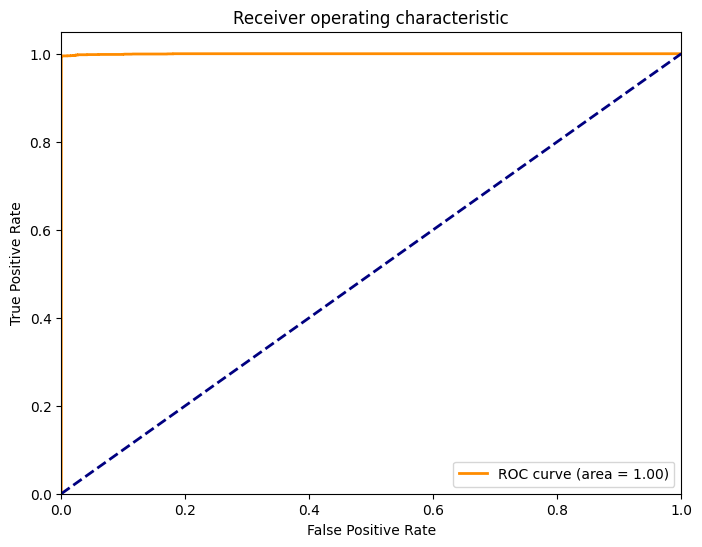

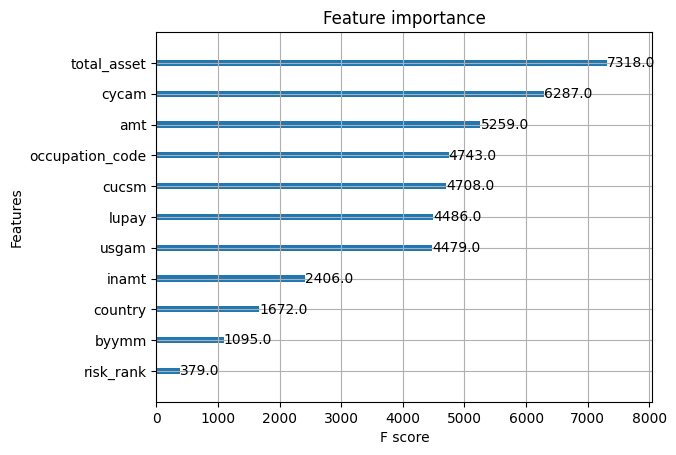

In [71]:
#Create XGBoost Classifier with best parameters
xgbBest = xgb.XGBClassifier(**study.best_params)
xgbBest.fit(X_train, Y_train)
xgbBest_pred = xgbBest.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgbBest_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgbBest_pred))
plot_roc_curve(Y_test, xgbBest.predict_proba(X_test)[::,1])

#Plot feature importance
xgb.plot_importance(xgbBest)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()



In [72]:
#Check amount of fraud in the model calculated by the model
fraud = xgbBest.predict_proba(test)
fraud = pd.DataFrame(fraud)
fraud = fraud[1]
fraud = fraud[fraud > 0.5]
len(fraud)





2

In [73]:
#Predict fraud probability for test data
xgbBest_pred_test_prob = xgbBest.predict_proba(test)
xgbBest_pred_test_prob = pd.DataFrame(xgbBest_pred_test_prob)
xgbBest_pred_test_prob.head()


,0,1
0,0.999299,0.000701
1,0.990054,0.009946
2,0.999638,0.000362
3,0.999613,0.000387
4,0.999592,0.000408


In [74]:
#Length of xgbBest_pred_test_prob
len(xgbBest_pred_test_prob)

1845

In [75]:
testAlertXGB2 = testAlert
testAlertXGB2['probability'] = xgbBest_pred_test_prob[1]
testAlertXGB2.head()

,alert_key,probability
0,352249,0.000701
1,352253,0.009946
2,352254,0.000362
3,352280,0.000387
4,352282,0.000408


In [76]:
#Combine my_submission_xgbBest and sample and replace the probability column with my_submission_xgbBest probability column
my_submission_xgbBest_combine = pd.merge(sample, testAlertXGB2, on='alert_key', how='left')
my_submission_xgbBest_combine.head()

,alert_key,probability_x,probability_y
0,357307,0.000017,0.006061
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.002010
4,354443,0.000526,0.002239


In [77]:
#Replace NaN values with with probailty_x column
my_submission_xgbBest_combine['probability_y'] = my_submission_xgbBest_combine['probability_y'].fillna(my_submission_xgbBest_combine['probability_x'])

#Drop probability_x column
my_submission_xgbBest_combine = my_submission_xgbBest_combine.drop(['probability_x'], axis=1)

#rename probability_y column to probability
my_submission_xgbBest_combine = my_submission_xgbBest_combine.rename(columns={'probability_y': 'probability'})




In [78]:
#Head of my_submission_xgbBest_combine
my_submission_xgbBest_combine.head()

,alert_key,probability
0,357307,0.006061
1,376329,0.000324
2,373644,0.000372
3,357668,0.002010
4,354443,0.002239


In [79]:
#Convert the dataframe to csv
my_submission_xgbBest_combine.to_csv('submission_xgbBestNewDataset.csv', index=False)
